In [ ]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

stimulus start: 0.15, stimulus end: 0.5
simulating 426 neurons. Start: Mon Aug  8 16:43:47 2022
sim end: Mon Aug  8 16:44:38 2022


INFO       width adjusted from 20. ms to 20.1 ms [brian2.monitors.ratemonitor.adjusted_width]


(<Figure size 1000x400 with 3 Axes>,
 <AxesSubplot:title={'center':'Raster Plot'}, ylabel='neuron #'>,
 <AxesSubplot:title={'center':'Population Activity'}, ylabel='A(t) [Hz]'>,
 <AxesSubplot:title={'center':'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

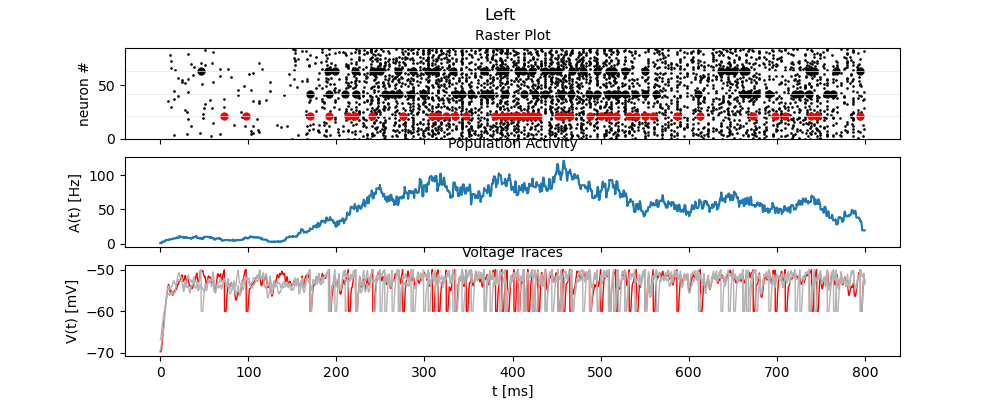

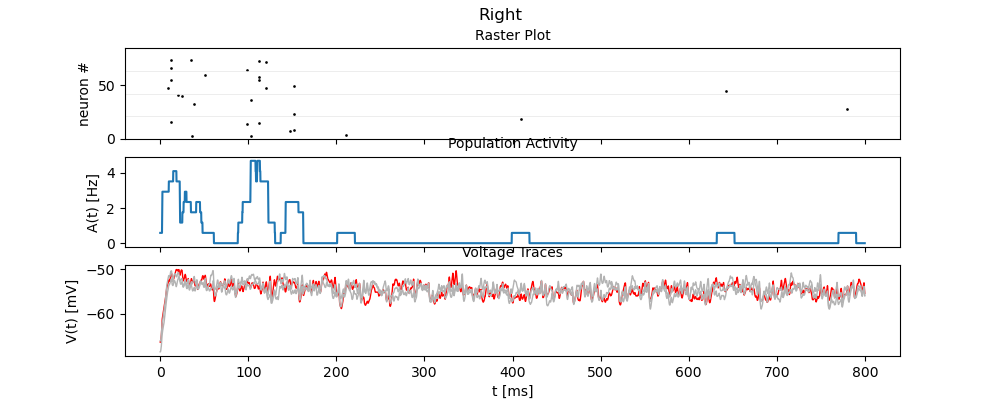

In [3]:
import wang_rmp

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy
import matplotlib.pyplot as plt
from math import floor
import time

b2.defaultclock.dt = 0.10 * b2.ms


stim_start = 150. * b2.ms
stim_duration = 350 * b2.ms
print("stimulus start: {}, stimulus end: {}".format(stim_start, stim_start+stim_duration))
results = wang_rmp.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                        t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                        coherence_level=+0.90, w_pos=2.0, mu0_mean_stimulus_Hz=500 * b2.Hz,
                                        max_sim_time=800. * b2.ms)
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                    results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                    sup_title="Left")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                    results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                    sup_title="Right")


In [6]:
rmp = results["voltage_monitor_A"]

ts = rmp.t/b2.ms

trace = rmp.v[0]/b2.mV



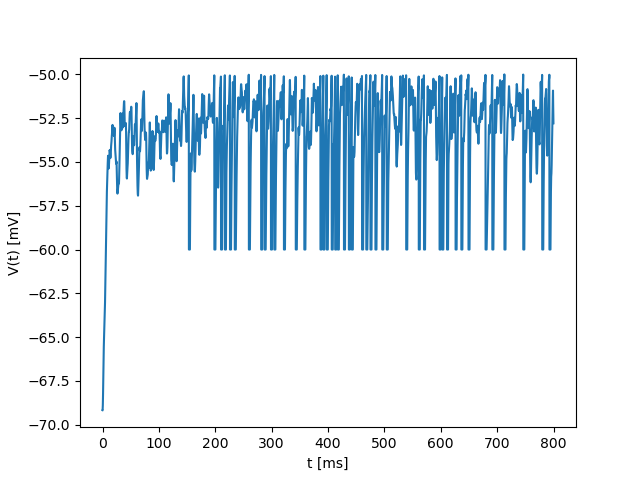

In [8]:
fig = plt.figure()


plt.plot(ts, trace)
plt.ylabel("V(t) [mV]")
plt.xlabel("t [ms]")
plt.show()
